In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix




In [12]:
IMG_HEIGHT = 350
IMG_WIDTH = 350
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

train_dir = r'../Dataset/Balanced_Train'
test_dir = r'../Dataset/Test'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)



train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)

class_names = test_ds_raw.class_names


Found 31155 files belonging to 5 classes.
Using 24924 files for training.
Found 31155 files belonging to 5 classes.
Using 6231 files for validation.
Found 4339 files belonging to 5 classes.


# Transfer Learning

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second, related task. It leverages pre-trained models, saving time and improving performance, especially when training data is limited.

However, **remember** that transfer learning does **not always guarantee higher accuracy** compared to a well-designed custom **CNN architecture**. In some cases, your own CNN model may perform better depending on the specific dataset and task.



In [2]:
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

train_dir = r'../Dataset/Balanced_Train'
test_dir = r'../Dataset/Test'

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)



train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(tf.data.AUTOTUNE)

class_names = test_ds_raw.class_names


Found 31155 files belonging to 5 classes.
Using 24924 files for training.
Found 31155 files belonging to 5 classes.
Using 6231 files for validation.
Found 4339 files belonging to 5 classes.


## **MobileNetV2**

In [ ]:


# Base model
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False

# Transfer learning model
model_mobile_1 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Better than Flatten
    layers.Dense(16, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(5, activation='softmax')  # 5 classes
])

model_mobile_1.compile(optimizer='AdamW', loss='categorical_crossentropy', metrics=['accuracy'])


# Callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4),
    ModelCheckpoint(r'..\Model\mobile_model_1.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
]

# Train
model_mobile_1.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)


Epoch 1/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8035 - loss: 0.5491
Epoch 1: val_accuracy improved from -inf to 0.91077, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 496s 631ms/step - accuracy: 0.8036 - loss: 0.5489 - val_accuracy: 0.9108 - val_loss: 0.2417 - learning_rate: 0.0010
Epoch 2/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9234 - loss: 0.2232
Epoch 2: val_accuracy improved from 0.91077 to 0.93003, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 500s 642ms/step - accuracy: 0.9234 - loss: 0.2232 - val_accuracy: 0.9300 - val_loss: 0.1922 - learning_rate: 0.0010
Epoch 3/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.9365 - loss: 0.1792
Epoch 3: val_accuracy improved from 0.93003 to 0.93532, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 535s 687ms/step - accuracy: 0.9365 - loss: 0.1792 - val_accuracy: 0.9353 - val_loss: 0.1785 - learning_rate: 0.0010
Epoch 4/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - accuracy: 0.9426 - loss: 0.1578
Epoch 4: val_accuracy improved from 0.93532 to 0.94094, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 531s 682ms/step - accuracy: 0.9426 - loss: 0.1577 - val_accuracy: 0.9409 - val_loss: 0.1586 - learning_rate: 0.0010
Epoch 5/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.9474 - loss: 0.1487
Epoch 5: val_accuracy did not improve from 0.94094
779/779 ━━━━━━━━━━━━━━━━━━━━ 670s 860ms/step - accuracy: 0.9474 - loss: 0.1487 - val_accuracy: 0.9292 - val_loss: 0.2062 - learning_rate: 0.0010
Epoch 6/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.9508 - loss: 0.1360
Epoch 6: val_accuracy did not improve from 0.94094
779/779 ━━━━━━━━━━━━━━━━━━━━ 494s 633ms/step - accuracy: 0.9508 - loss: 0.1360 - val_accuracy: 0.9032 - val_loss: 0.2995 - learning_rate: 0.0010
Epoch 7/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.9522 - loss: 0.1301
Epoch 7: val_accuracy improved from 0.94094 to 0.94335, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 506s 649ms/step - accuracy: 0.9522 - loss: 0.1301 - val_accuracy: 0.9433 - val_loss: 0.1581 - learning_rate: 0.0010
Epoch 8/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.9604 - loss: 0.1149
Epoch 8: val_accuracy improved from 0.94335 to 0.94479, saving model to mobile_model_1.h5


779/779 ━━━━━━━━━━━━━━━━━━━━ 525s 674ms/step - accuracy: 0.9604 - loss: 0.1149 - val_accuracy: 0.9448 - val_loss: 0.1658 - learning_rate: 0.0010
Epoch 9/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.9587 - loss: 0.1120
Epoch 9: val_accuracy did not improve from 0.94479
779/779 ━━━━━━━━━━━━━━━━━━━━ 561s 721ms/step - accuracy: 0.9587 - loss: 0.1120 - val_accuracy: 0.9305 - val_loss: 0.2127 - learning_rate: 0.0010
Epoch 10/20
779/779 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.9591 - loss: 0.1092
Epoch 10: val_accuracy did not improve from 0.94479
779/779 ━━━━━━━━━━━━━━━━━━━━ 460s 591ms/step - accuracy: 0.9591 - loss: 0.1092 - val_accuracy: 0.9241 - val_loss: 0.2152 - learning_rate: 0.0010


In [8]:
model = models.load_model(r"D:\Internship\Blood_Type_Classification_CNN\Notebook\mobile_model_1.h5") 

136/136 ━━━━━━━━━━━━━━━━━━━━ 66s 474ms/step
Test Accuracy: 0.8908


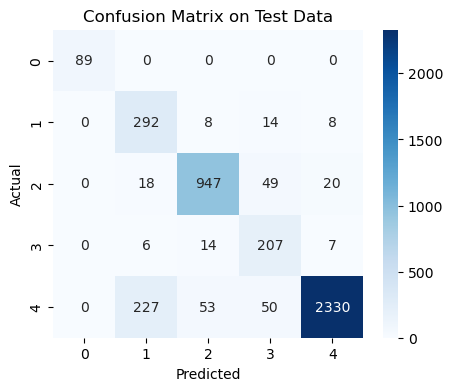

              precision    recall  f1-score   support

    Basophil       1.00      1.00      1.00        89
  Eosinophil       0.54      0.91      0.68       322
  Lymphocyte       0.93      0.92      0.92      1034
    Monocyte       0.65      0.88      0.75       234
  Neutrophil       0.99      0.88      0.93      2660

    accuracy                           0.89      4339
   macro avg       0.82      0.92      0.85      4339
weighted avg       0.92      0.89      0.90      4339



In [9]:
# Predict
y_pred = model.predict(test_ds)
y_pred_classes = y_pred.argmax(axis=1)

# Get true labels
y_true = []
for _, labels in test_ds:
    y_true.extend(labels.numpy())
y_true = np.array(y_true)
y_true = np.argmax(y_true, axis=1)  

# Accuracy
acc = accuracy_score(y_true, y_pred_classes)
print(f"Test Accuracy: {acc:.4f}") 

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Test Data")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred_classes, target_names=class_names))
